In [4]:
#!pip install -U transformers

In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.11.0+cu113 True


In [2]:
#!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

In [3]:
#!pip install -U datasets seqeval

Data Preparation

In [ ]:
import pandas as pd
import os

In [ ]:
!pwd

/content


In [ ]:
import json
def ctype(x):
  res = json.loads(x)
  return res

a = '[10,20,30,40]'
print(ctype(a))


[10, 20, 30, 40]


train data

In [ ]:
def ctype(x):
  res = json.loads(x)
  return res


l=os.listdir('./annotate/')
words=[]
bbox=[]
tags=[]
image_path=[]
for i in range(len(l)):
  if l[i].__contains__('.csv'):
    df = pd.read_csv('./annotate/'+l[i])
    df['bbox'] = df['bbox'].apply(ctype)
    words.append(df['words'].to_list())
    bbox.append(df['bbox'].to_list())
    tags.append(df['tags'].to_list())
    image_path.append('/content/images/'+l[i].split('.')[0]+'.jpeg') 

df = pd.DataFrame(list(zip(words,bbox,tags,image_path)),columns=['words','bbox','tags','image_path'])
df.head(5)


,words,bbox,tags,image_path
0,"[Microsoft, INVOICE, #, 100, Redmond,, Washing...","[[187.59765625, 98.828125, 323.73046875, 128.9...","[vendor_name, invoice_name, invoice_no, invoic...",/content/images/Invoice # 100.jpeg
1,"[Microsoft, INVOICE, #45, Redmond,, Washington...","[[187.59765625, 98.828125, 323.73046875, 128.9...","[vendor_name, invoice_name, invoice_no, ven_ad...",/content/images/Invoice # 45.jpeg
2,"[Microsoft, INVOICE, #20, Redmond,, Washington...","[[187.59765625, 98.828125, 323.73046875, 128.9...","[vendor_name, invoice_name, invoice_no, ven_ad...",/content/images/Invoice # 20.jpeg
3,"[Microsoft, INVOICE, #50, Redmond,, Washington...","[[187.59765625, 98.828125, 323.73046875, 128.9...","[vendor_name, invoice_name, invoice_no, ven_ad...",/content/images/Invoice # 50.jpeg


test data

In [ ]:
def ctype(x):
  res = json.loads(x)
  return res


l=os.listdir('./test_annotate/')
words=[]
bbox=[]
tags=[]
image_path=[]
for i in range(len(l)):
  if l[i].__contains__('.csv'):
    test_df = pd.read_csv('./test_annotate/'+l[i])
    test_df['bbox'] = test_df['bbox'].apply(ctype)
    words.append(test_df['words'].to_list())
    bbox.append(test_df['bbox'].to_list())
    tags.append(test_df['tags'].to_list())
    image_path.append('/content/test_images/'+l[i].split('.')[0]+'.jpeg') 

test_df = pd.DataFrame(list(zip(words,bbox,tags,image_path)),columns=['words','bbox','tags','image_path'])
test_df.head(5)

,words,bbox,tags,image_path
0,"[Microsoft, INVOICE, #2, Mountain, View,, Cali...","[[187.59765625, 98.828125, 323.73046875, 128.9...","[vendor_name, invoice_name, invoice_no, ven_ad...",/content/test_images/Invoice2.jpeg


In [ ]:
labels = []
for i in tags:
  labels+=i
labels= list(set(labels))
num_labels= len(labels)
labels

['amt_due',
 'tax',
 'tab',
 'am_p',
 'invoice_name',
 'vendor_name',
 'invoice_no',
 'dis',
 'dis_per',
 'subt',
 'ut_am',
 'pay_type',
 'unit_am',
 'dis_am',
 'bill_date',
 'ship_am',
 'am',
 'tax_am',
 'ven_add',
 'tax_per',
 'ship_add',
 'total',
 'due_date',
 'bill_add',
 'other']

In [ ]:
id2label = {v:k for v,k in enumerate(labels)}
label2id = {k:v for v,k in enumerate(labels)}
print(label2id)
print(id2label)

{'amt_due': 0, 'tax': 1, 'tab': 2, 'am_p': 3, 'invoice_name': 4, 'vendor_name': 5, 'invoice_no': 6, 'dis': 7, 'dis_per': 8, 'subt': 9, 'ut_am': 10, 'pay_type': 11, 'unit_am': 12, 'dis_am': 13, 'bill_date': 14, 'ship_am': 15, 'am': 16, 'tax_am': 17, 'ven_add': 18, 'tax_per': 19, 'ship_add': 20, 'total': 21, 'due_date': 22, 'bill_add': 23, 'other': 24}
{0: 'amt_due', 1: 'tax', 2: 'tab', 3: 'am_p', 4: 'invoice_name', 5: 'vendor_name', 6: 'invoice_no', 7: 'dis', 8: 'dis_per', 9: 'subt', 10: 'ut_am', 11: 'pay_type', 12: 'unit_am', 13: 'dis_am', 14: 'bill_date', 15: 'ship_am', 16: 'am', 17: 'tax_am', 18: 'ven_add', 19: 'tax_per', 20: 'ship_add', 21: 'total', 22: 'due_date', 23: 'bill_add', 24: 'other'}


In [ ]:
train_df = df.copy()
train_df['tags'] = train_df['tags'].apply(lambda x: [label2id[i] for i in x])
train_df.insert(0,'id',range(0,0+len(df)))
train_df['id'] = train_df['id'].astype('str')
#test_df = test_df.copy()
test_df.insert(0,'id',range(0,len(test_df)))
test_df['id'] = test_df['id'].astype('str')

In [ ]:
test_df['tags'] = test_df['tags'].apply(lambda x: [label2id[i] for i in x])

In [ ]:
train_df

,id,words,bbox,tags,image_path
0,0,"[Microsoft, INVOICE, #, 100, Redmond,, Washing...","[[187.59765625, 98.828125, 323.73046875, 128.9...","[5, 4, 6, 6, 18, 18, 18, 18, 23, 23, 23, 23, 2...",/content/images/Invoice # 100.jpeg
1,1,"[Microsoft, INVOICE, #45, Redmond,, Washington...","[[187.59765625, 98.828125, 323.73046875, 128.9...","[5, 4, 6, 18, 18, 18, 18, 23, 23, 23, 23, 23, ...",/content/images/Invoice # 45.jpeg
2,2,"[Microsoft, INVOICE, #20, Redmond,, Washington...","[[187.59765625, 98.828125, 323.73046875, 128.9...","[5, 4, 6, 18, 18, 18, 18, 23, 23, 23, 23, 23, ...",/content/images/Invoice # 20.jpeg
3,3,"[Microsoft, INVOICE, #50, Redmond,, Washington...","[[187.59765625, 98.828125, 323.73046875, 128.9...","[5, 4, 6, 18, 18, 18, 18, 23, 23, 23, 23, 23, ...",/content/images/Invoice # 50.jpeg


In [5]:
#test_df['bbox'][0]

In [ ]:
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D, Dataset

features = Features(
    {
        'id': Value(dtype='string',id=None),
     'words': Sequence(feature=Value(dtype='string',id=None),length=-1,id=None),
     'bbox': Sequence(feature=Sequence(feature=Value(dtype='int64',id=None),length=-1,id=None),length=-1,id=None),
     'tags': Sequence(feature=ClassLabel(num_classes=num_labels,names=labels,names_file=None,id=None),length=-1,id=None),
     'image_path': Value(dtype='string',id=None)
    }
)

train_datasets = Dataset.from_pandas(train_df,features=features)
test_datasets = Dataset.from_pandas(test_df,features=features)
train_datasets


Dataset({
    features: ['id', 'words', 'bbox', 'tags', 'image_path'],
    num_rows: 4
})

In [ ]:
test_datasets

Dataset({
    features: ['id', 'words', 'bbox', 'tags', 'image_path'],
    num_rows: 1
})

Preprocess Data

In [ ]:
labels = train_datasets.features['tags'].feature.names
print(labels)

['am', 'ut_am', 'bill_date', 'subt', 'amt_due', 'tax_per', 'am_p', 'total', 'tab', 'tax', 'bill_add', 'unit_am', 'invoice_name', 'vendor_name', 'dis', 'ship_add', 'dis_per', 'ven_add', 'tax_am', 'dis_am', 'ship_am', 'other', 'pay_type', 'due_date', 'invoice_no']


In [ ]:
id2label = {v: k for v, k in enumerate(labels)}
label2id = {k: v for v, k in enumerate(labels)}
print(label2id)
print(id2label)

{'O': 0, 'B-HEADER': 1, 'I-HEADER': 2, 'B-QUESTION': 3, 'I-QUESTION': 4, 'B-ANSWER': 5, 'I-ANSWER': 6}
{0: 'O', 1: 'B-HEADER', 2: 'I-HEADER', 3: 'B-QUESTION', 4: 'I-QUESTION', 5: 'B-ANSWER', 6: 'I-ANSWER'}


In [6]:
from PIL import Image, ImageDraw, ImageFont
example = train_datasets[2]
print(example.keys())
image = Image.open(example['image_path'])
image = image.convert("RGB")
new_image = image.resize((600, 800))
#new_image

NameError: ignored

In [ ]:
from PIL import Image
from transformers import LayoutLMv2Processor
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D
from transformers import pipeline

processor = LayoutLMv2Processor.from_pretrained("microsoft/layoutlmv2-base-uncased", revision="no_ocr")

# we need to define custom features
features = Features({
    'image': Array3D(dtype="int64", shape=(3, 224, 224)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'token_type_ids': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': Sequence(ClassLabel(names=labels)),
})

def preprocess_data(examples):
  images = [Image.open(path).convert("RGB") for path in examples['image_path']]
  words = examples['words']
  boxes = examples['bbox']
  word_labels = examples['tags']
  
  encoded_inputs = processor(images, words, boxes=boxes, word_labels=word_labels,
                             padding="max_length", truncation=True)
  
  return encoded_inputs

train_dataset = train_datasets.map(preprocess_data, batched=True, remove_columns=train_datasets.column_names,features=features)
test_dataset = test_datasets.map(preprocess_data, batched=True, remove_columns=test_datasets.column_names,features=features)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
train_dataset

Dataset({
    features: ['image', 'input_ids', 'attention_mask', 'token_type_ids', 'bbox', 'labels'],
    num_rows: 4
})

In [ ]:
test_dataset

Dataset({
    features: ['image', 'input_ids', 'attention_mask', 'token_type_ids', 'bbox', 'labels'],
    num_rows: 1
})

In [ ]:
processor.tokenizer.decode(train_dataset['input_ids'][0])

'[CLS] microsoft invoice # 100 redmond, washington, united states bill to : mountain view, california, united states ship to : mountain view, california, united states date : payment terms : due date : po number : balance due : apr 29, 2022 card may 25, 2022 24325 $ 3, 318. 72 item surface pro mouse quantity 5 2 rate $ 1, 500. 00 $ 20. 00 amount $ 7, 500. 00 $ 40. 00 subtotal : discount ( 12 % ) : tax ( 10 % ) : shipping : total : amount paid : $ 7, 540. 00 $ 904. 80 $ 663. 52 $ 20. 00 $ 7, 318. 72 $ 4, 000. 00 terms : late fees will increase due amount by 3 % [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [

In [ ]:
print(train_dataset['bbox'][0])

[[0, 0, 0, 0], [187, 98, 323, 128], [1276, 77, 1592, 137], [1276, 77, 1592, 137], [1276, 77, 1592, 137], [1495, 158, 1527, 199], [1527, 163, 1588, 195], [136, 229, 272, 262], [136, 229, 272, 262], [136, 229, 272, 262], [277, 229, 446, 262], [277, 229, 446, 262], [453, 229, 541, 255], [544, 227, 632, 259], [132, 313, 177, 348], [175, 313, 224, 348], [175, 313, 224, 348], [134, 363, 260, 388], [263, 360, 340, 393], [263, 360, 340, 393], [134, 397, 273, 427], [134, 397, 273, 427], [278, 397, 366, 423], [134, 431, 220, 457], [506, 315, 567, 350], [567, 313, 617, 348], [567, 313, 617, 348], [508, 363, 634, 388], [637, 360, 713, 393], [637, 360, 713, 393], [508, 395, 645, 427], [508, 395, 645, 427], [652, 397, 738, 423], [508, 431, 594, 457], [1210, 311, 1278, 337], [1210, 311, 1278, 337], [1074, 375, 1182, 401], [1187, 373, 1278, 399], [1187, 373, 1278, 399], [1148, 431, 1206, 464], [1208, 436, 1278, 461], [1208, 436, 1278, 461], [1118, 496, 1167, 526], [1168, 498, 1278, 522], [1168, 498, 1

In [ ]:
train_dataset.set_format(type="torch", device="cuda")
test_dataset.set_format(type="torch", device="cuda")

In [ ]:
train_dataset.features.keys()

dict_keys(['image', 'input_ids', 'attention_mask', 'token_type_ids', 'bbox', 'labels'])

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=2)

In [ ]:
batch = next(iter(train_dataloader))

for k,v in batch.items():
  print(k, v.shape)

image torch.Size([4, 3, 224, 224])
input_ids torch.Size([4, 512])
attention_mask torch.Size([4, 512])
token_type_ids torch.Size([4, 512])
bbox torch.Size([4, 512, 4])
labels torch.Size([4, 512])


Training Model

In [ ]:
from transformers import LayoutLMv2ForTokenClassification, AdamW
import torch
from tqdm.notebook import tqdm

model = LayoutLMv2ForTokenClassification.from_pretrained('microsoft/layoutlmv2-base-uncased',
                                                          num_labels=len(labels))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
optimizer = AdamW(model.parameters(), lr=5e-5)

global_step = 0
num_train_epochs = 10

t_total = len(train_dataloader) * num_train_epochs # total number of training steps 

#put the model in training mode
model.train() 
for epoch in range(num_train_epochs):  
   print("Epoch:", epoch)
   for batch in tqdm(train_dataloader):
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(**batch) 
        loss = outputs.loss
        
        # print loss every 100 steps
        if global_step % 100 == 0:
          print(f"Loss after {global_step} steps: {loss.item()}")

        loss.backward()
        optimizer.step()
        global_step += 1

Some weights of the model checkpoint at microsoft/layoutlmv2-base-uncased were not used when initializing LayoutLMv2ForTokenClassification: ['layoutlmv2.visual.backbone.bottom_up.res4.15.conv1.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.11.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.2.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.1.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.3.conv1.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.10.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res2.0.shortcut.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.1.conv1.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.14.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.3.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res3.2.conv2.norm.num_batches_trac

Epoch: 0


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/layoutlmv2/modeling_layoutlmv2.py:780: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  // self.config.image_feature_pool_shape[1]
/usr/local/lib/python3.7/dist-packages/transformers/models/layoutlmv2/modeling_layoutlmv2.py:790: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  // se

RuntimeError: ignored

Evaluation

In [ ]:
from datasets import load_metric

metric = load_metric("seqeval")

# put model in evaluation mode
model.eval()
for batch in tqdm(test_dataloader, desc="Evaluating"):
    with torch.no_grad():
        input_ids = batch['input_ids'].to(device)
        bbox = batch['bbox'].to(device)
        image = batch['image'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        token_type_ids = batch['token_type_ids'].to(device)
        #labels = labels.type(torch.FloatTensor)
        labels = batch['labels'].to(device)

        # forward pass
        outputs = model(input_ids=input_ids, #bbox=bbox, 
                        image=image,attention_mask=attention_mask, token_type_ids=token_type_ids, labels=labels)
        
        # predictions
        predictions = outputs.logits.argmax(dim=2)

        # Remove ignored index (special tokens)
        true_predictions = [
            [id2label[p.item()] for (p, l) in zip(prediction, label) if l != -100]
            for prediction, label in zip(predictions, labels)
        ]
        true_labels = [
            [id2label[l.item()] for (p, l) in zip(prediction, label) if l != -100]
            for prediction, label in zip(predictions, labels)
        ]

        metric.add_batch(predictions=true_predictions, references=true_labels)

final_score = metric.compute()
print(final_score)

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

AttributeError: ignored

Inference

In [ ]:
example = test_datasets[0]
print(example.keys())

dict_keys(['id', 'words', 'bbox', 'tags', 'image_path'])


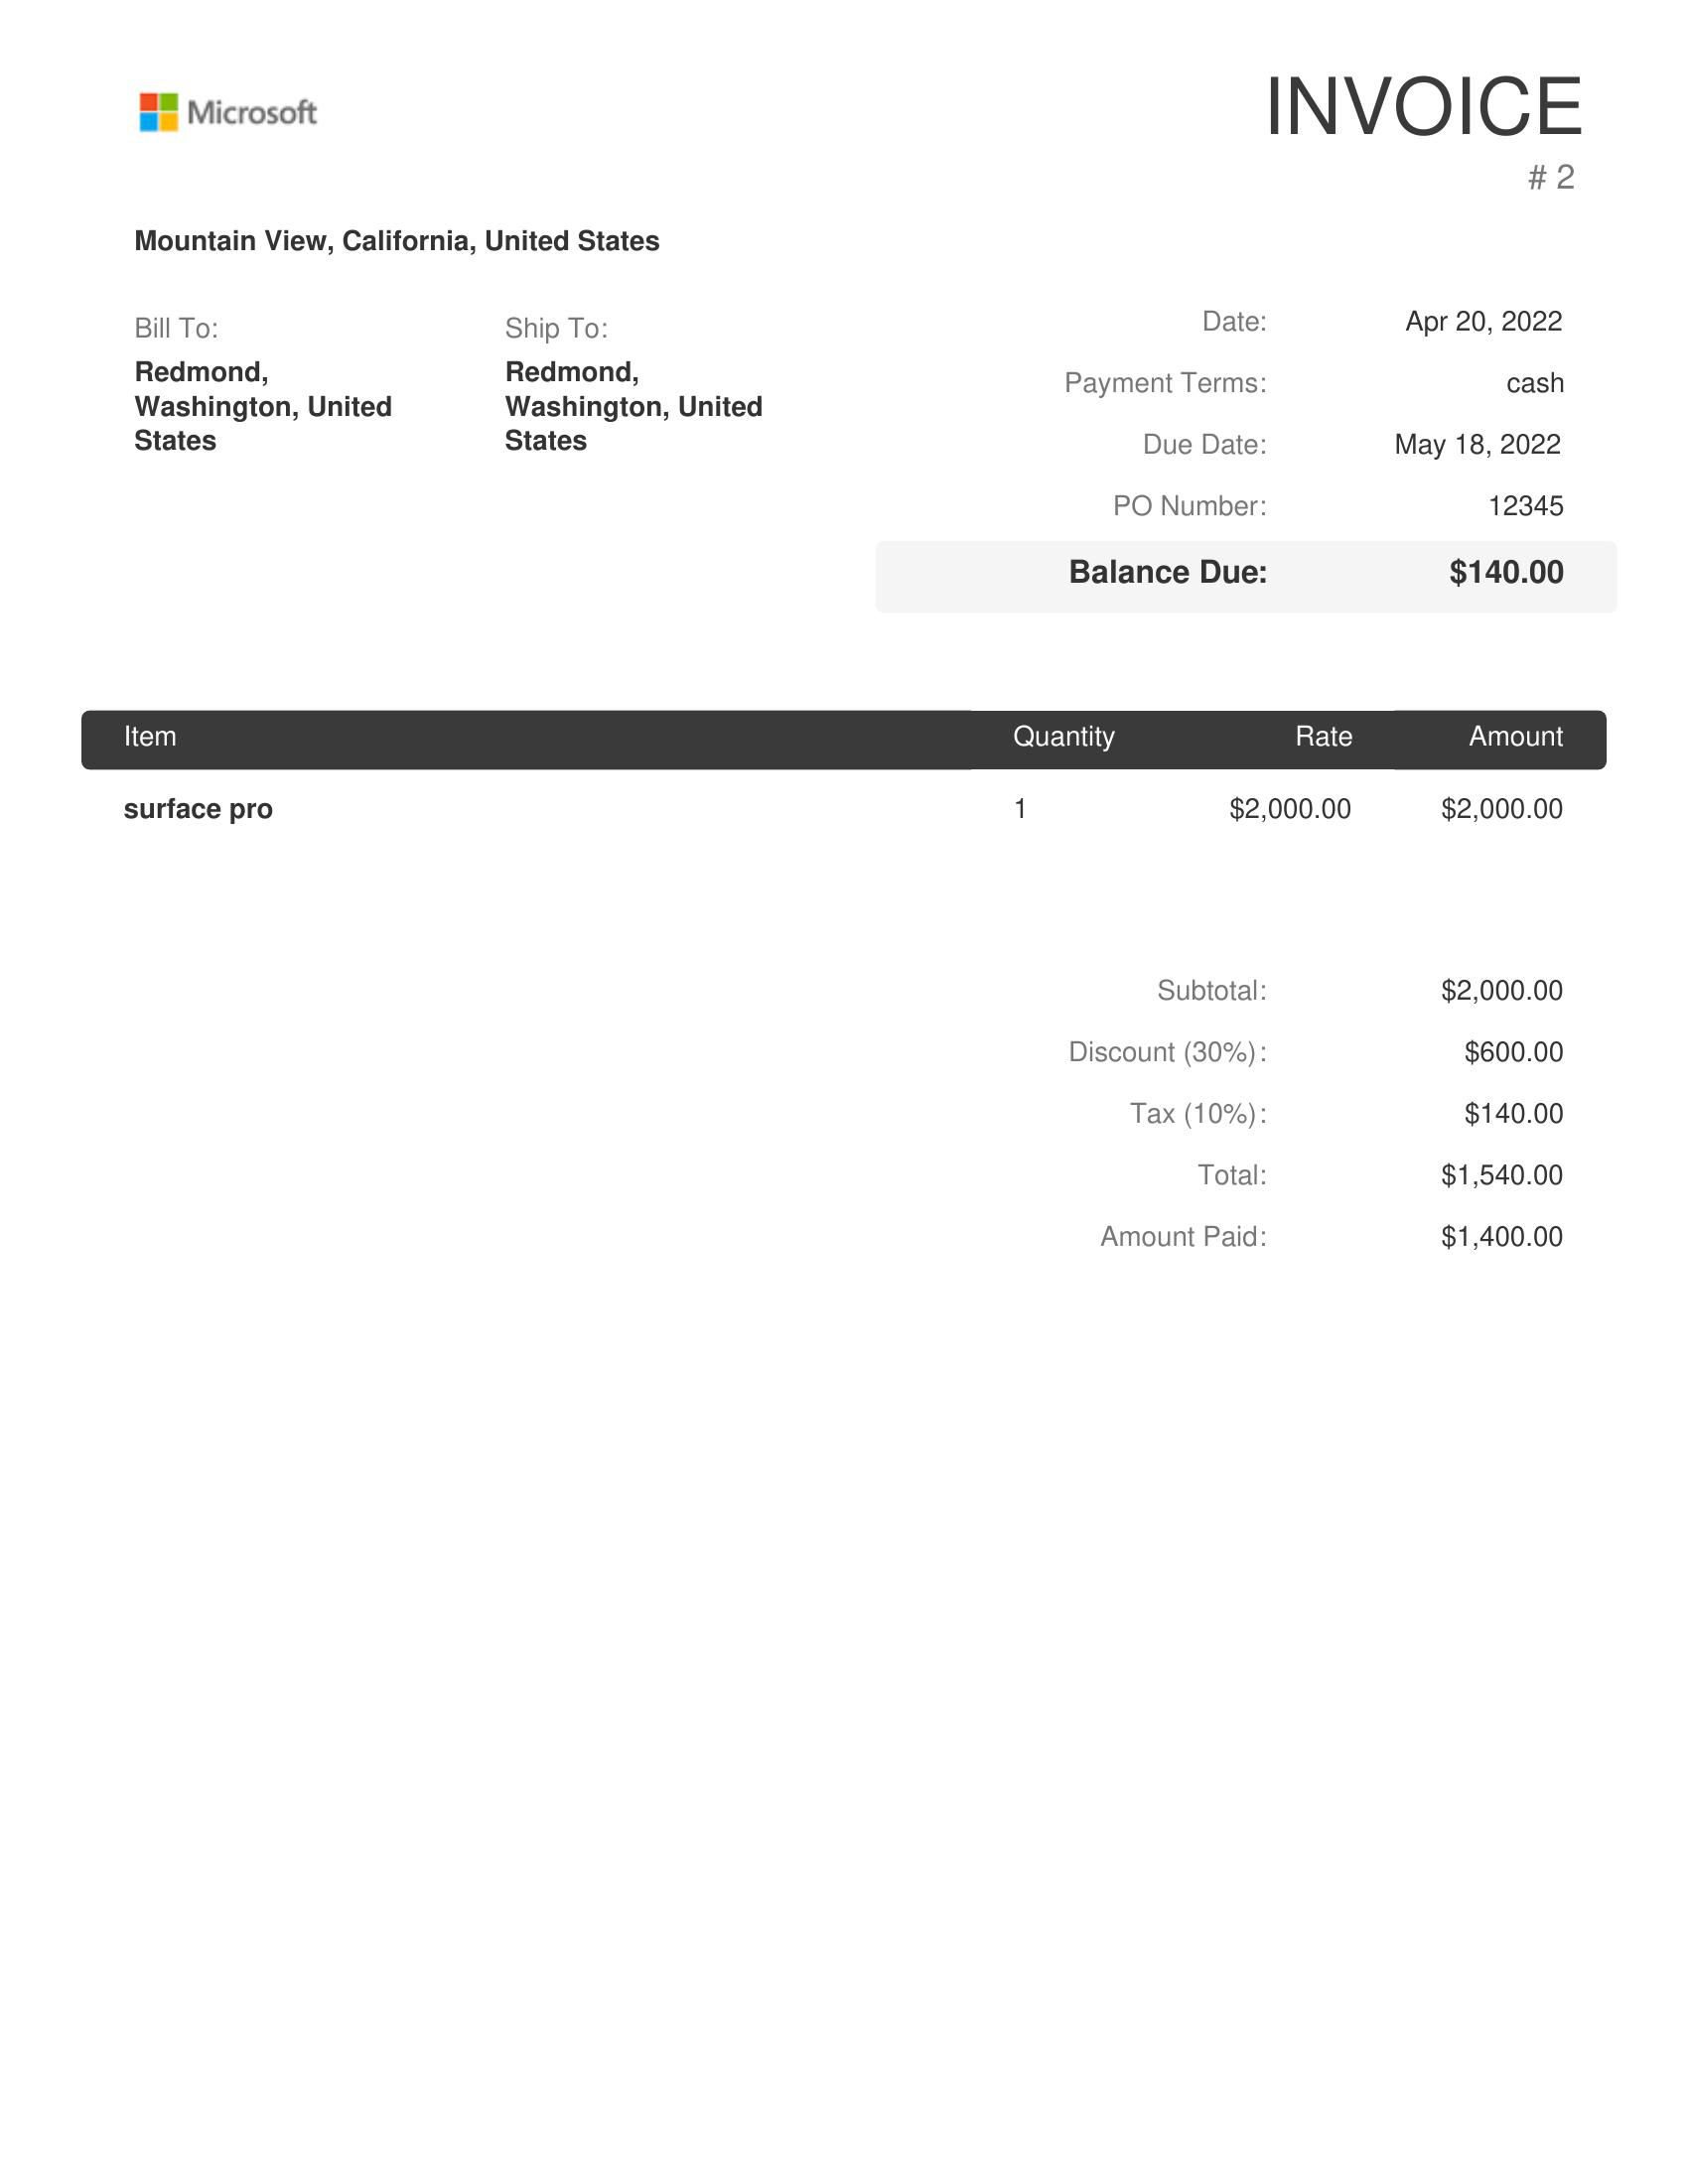

In [ ]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open(example['image_path'])
image = image.convert("RGB")
image

In [ ]:
encoded_inputs = processor(image, example['words'], boxes=example['bboxes'], word_labels=example['ner_tags'],
                           padding="max_length", truncation=True, return_tensors="pt")

KeyError: ignored

In [ ]:
labels = encoded_inputs.pop('labels').squeeze().tolist()
for k,v in encoded_inputs.items():
  encoded_inputs[k] = v.to(device)

In [ ]:
# forward pass
outputs = model(**encoded_inputs)

/usr/local/lib/python3.7/dist-packages/transformers/models/layoutlmv2/modeling_layoutlmv2.py:780: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  // self.config.image_feature_pool_shape[1]
/usr/local/lib/python3.7/dist-packages/transformers/models/layoutlmv2/modeling_layoutlmv2.py:790: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  // se

In [ ]:
outputs.logits.shape

torch.Size([1, 512, 7])

In [ ]:
def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]

predictions = outputs.logits.argmax(-1).squeeze().tolist()
token_boxes = encoded_inputs.bbox.squeeze().tolist()

width, height = image.size

true_predictions = [id2label[prediction] for prediction, label in zip(predictions, labels) if label != -100]
true_labels = [id2label[label] for prediction, label in zip(predictions, labels) if label != -100]
true_boxes = [unnormalize_box(box, width, height) for box, label in zip(token_boxes, labels) if label != -100]

In [ ]:
print(true_predictions)

['B-ANSWER', 'B-QUESTION', 'B-QUESTION', 'B-QUESTION', 'B-QUESTION', 'B-QUESTION', 'B-ANSWER', 'B-ANSWER', 'B-HEADER', 'B-HEADER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-HEADER', 'I-HEADER', 'I-HEADER', 'I-HEADER', 'B-QUESTION', 'I-QUESTION', 'B-QUESTION', 'I-QUESTION', 'I-QUESTION', 'B-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'B-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'B-ANSWER', 'I-ANSWER', 'I-ANSWER', 'B-ANSWER', 'I-ANSWER', 'I-ANSWER', 'B-ANSWER', 'I-ANSWER', 'I-ANSWER', 'B-QUESTION', 'I-QUESTION', 'B-QUESTION', 'I-QUESTION', 'B-QUESTION', 'I-QUESTION', 'B-QUESTION', 'I-QUESTION', 'B-QUESTION', 'I-QUESTION', 'B-QUESTION', 'I-QUESTION', 'B-HEADER', 'I-QUESTION', 'B-QUESTION', 'I-QUESTION', 'I-QUESTION', 'I-QUESTION', 'I-QUESTION', 'I-QUESTION', 'I-QUESTION', 'I-QUESTION', 'I-QUESTION', 'I-QUESTION', 'B-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER

In [ ]:
print(true_labels)

['B-ANSWER', 'B-QUESTION', 'B-QUESTION', 'B-QUESTION', 'B-QUESTION', 'B-QUESTION', 'B-ANSWER', 'O', 'B-QUESTION', 'B-QUESTION', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-HEADER', 'I-HEADER', 'I-HEADER', 'I-HEADER', 'B-QUESTION', 'I-QUESTION', 'B-QUESTION', 'I-QUESTION', 'I-QUESTION', 'B-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'B-ANSWER', 'I-ANSWER', 'I-ANSWER', 'B-ANSWER', 'I-ANSWER', 'I-ANSWER', 'B-ANSWER', 'I-ANSWER', 'I-ANSWER', 'B-QUESTION', 'I-QUESTION', 'B-QUESTION', 'I-QUESTION', 'B-QUESTION', 'I-QUESTION', 'B-QUESTION', 'I-QUESTION', 'B-QUESTION', 'I-QUESTION', 'B-QUESTION', 'I-QUESTION', 'B-HEADER', 'I-HEADER', 'B-QUESTION', 'I-QUESTION', 'I-QUESTION', 'I-QUESTION', 'I-QUESTION', 'I-QUESTION', 'I-QUESTION', 'I-QUESTION', 'B-QUESTION', 'I-QUESTION', 'B-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I-ANSWER', 'I

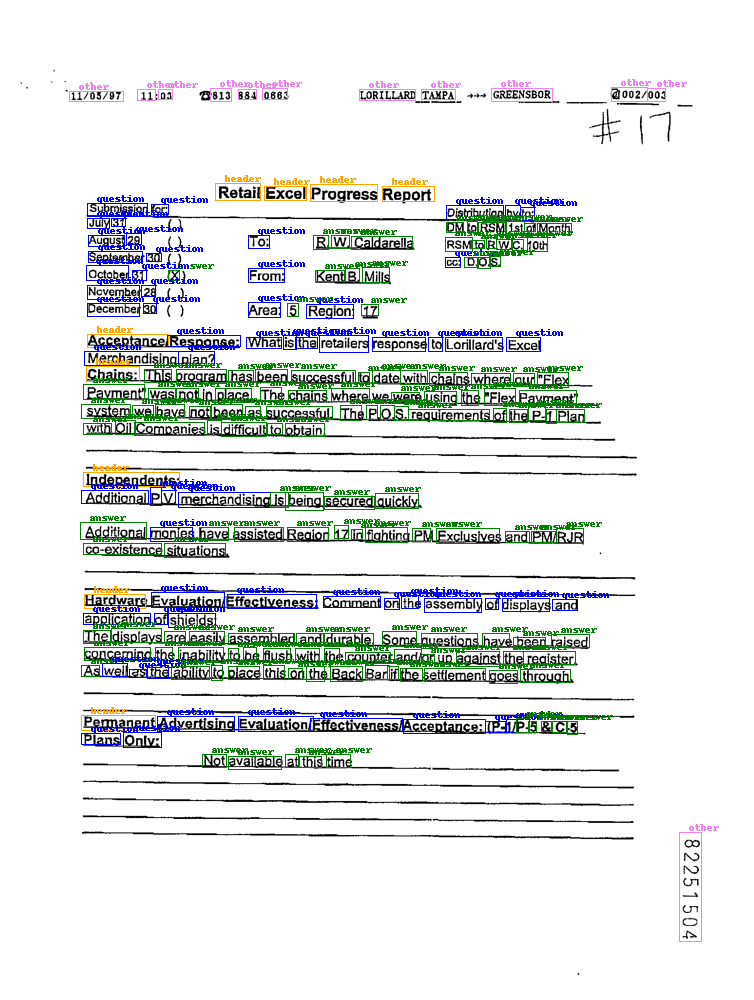

In [ ]:
from PIL import ImageDraw

draw = ImageDraw.Draw(image)

font = ImageFont.load_default()

def iob_to_label(label):
    label = label[2:]
    if not label:
      return 'other'
    return label

label2color = {'question':'blue', 'answer':'green', 'header':'orange', 'other':'violet'}

for prediction, box in zip(true_predictions, true_boxes):
    predicted_label = iob_to_label(prediction).lower()
    draw.rectangle(box, outline=label2color[predicted_label])
    draw.text((box[0] + 10, box[1] - 10), text=predicted_label, fill=label2color[predicted_label], font=font)

image

Ground truth

In [ ]:
example.keys()

dict_keys(['id', 'words', 'bboxes', 'ner_tags', 'image_path'])

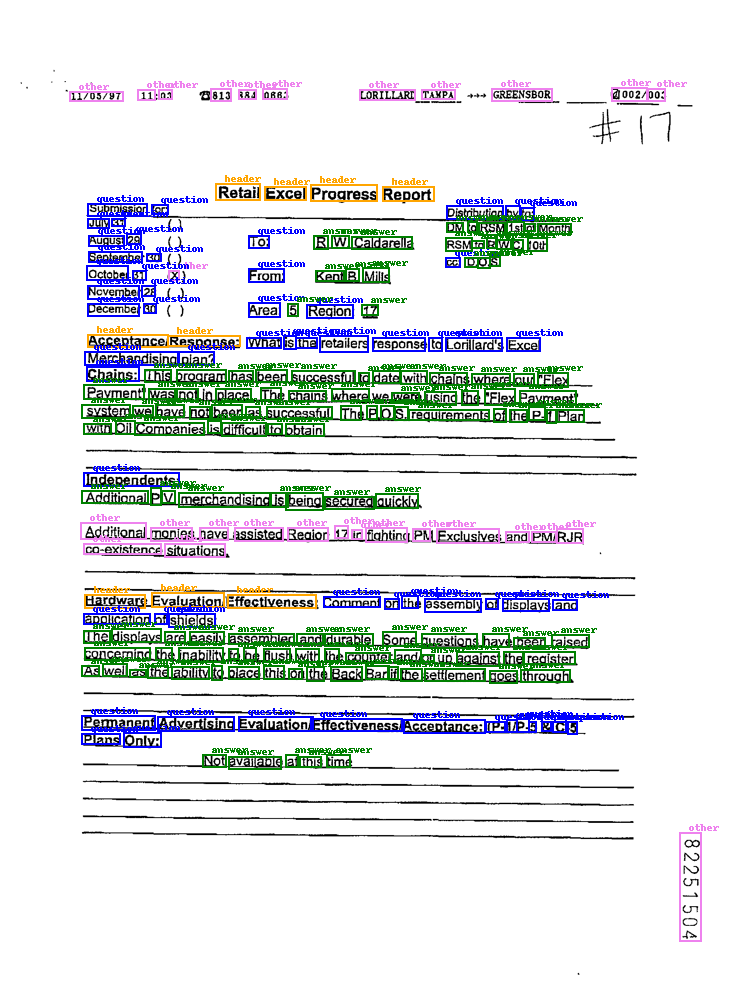

In [ ]:
image = Image.open(example['image_path'])
image = image.convert("RGB")

draw = ImageDraw.Draw(image)

for word, box, label in zip(example['words'], example['bboxes'], example['ner_tags']):
  actual_label = iob_to_label(id2label[label]).lower()
  box = unnormalize_box(box, width, height)
  draw.rectangle(box, outline=label2color[actual_label], width=2)
  draw.text((box[0] + 10, box[1] - 10), actual_label, fill=label2color[actual_label], font=font)

image